<a href="https://colab.research.google.com/github/tati088/InteligenciaArtificialTati-/blob/main/TatianaQui%C3%B1onez_ImagenSimilar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install imagehash

In [20]:

#Librerias 
import numpy as np
import pandas as pd
import cv2  
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import imagehash

In [21]:
images = ['https://i.ebayimg.com/images/g/vOUAAOSwVHle64yO/s-l1600.jpg',
         'https://i.ebayimg.com/images/g/jN8AAOSwxMle64yY/s-l1600.jpg',
         'https://i.ebayimg.com/images/g/3p8AAOSwk2Je64ym/s-l1600.jpg',
         'https://i.ebayimg.com/images/g/qqYAAOSweNle64zN/s-l1600.jpg',
         'https://i.ebayimg.com/images/g/cnkAAOSw~n9e64za/s-l1600.jpg',
         'https://i.ebayimg.com/images/g/3p8AAOSwk2Je64ym/s-l64.jpg',
         'https://i.ebayimg.com/images/g/qqYAAOSweNle64zN/s-l64.jpg']

In [22]:
df = pd.DataFrame(columns=['image','ahash','phash','dhash','whash','colorhash'])

for url in images:
    file =  Image.fromarray(io.imread(url))
    data = {
        'image': url,
        'ahash': imagehash.average_hash(file),
        'phash': imagehash.phash(file),
        'dhash': imagehash.dhash(file),
        'whash': imagehash.whash(file),
        'colorhash': imagehash.colorhash(file),   
    }
    
    df = df.append(data, ignore_index=True)

In [23]:
df.head(10)

,image,ahash,phash,dhash,whash,colorhash
0,https://i.ebayimg.com/images/g/vOUAAOSwVHle64y...,333e9f8981c3c3e3,ac9ec7216b61b076,e7643c330f0f0f0f,033e9f9981c3c3e3,072c0040000
1,https://i.ebayimg.com/images/g/jN8AAOSwxMle64y...,0f0783ce0f8b8b05,ba052a9d13f87f21,fcef273c6a3b3359,0f17039f0f8f8f05,0e400008002
2,https://i.ebayimg.com/images/g/3p8AAOSwk2Je64y...,fe86c38181c1c3c7,f4959690dbc385a5,f436060337978f0e,fe86c381c1c1c3e7,06280040001
3,https://i.ebayimg.com/images/g/qqYAAOSweNle64z...,2700017303030f9f,af41943dc186ad3d,d6cac3c3c36f7f3f,7702037323838fbf,06080009000
4,https://i.ebayimg.com/images/g/cnkAAOSw~n9e64z...,78053f3f839383c3,add3406cd3cdcd21,c18d73721f27379e,380d3f3f839383c3,0e2c0001000
5,https://i.ebayimg.com/images/g/3p8AAOSwk2Je64y...,fe86c38181c1c3c7,f4959690dbc385a5,f436060337978f0e,fe86c381c1c1c3e7,06280080000
6,https://i.ebayimg.com/images/g/qqYAAOSweNle64z...,2700017303030f9f,af41943dc086ad7d,d6dac3c3d36f7f3f,3706037323838fbf,06280000000


In [24]:
pip install  distance

In [25]:
import distance

def find_similar_images(df, ahash_column, image_url):
    """Compare an unseen image to previously seen images and return
    a list of images ranked by their similarity according to the 
    Hamming distance of their average hash or ahash.
    
    :param df: Pandas dataframe containing image and ahash columns
    :param ahash_column: Name of ahash column
    :param image_url: URL of the unseen image to hash and compare
   
    :return
        Pandas dataframe containing the most similar images
    """
    
    file =  Image.fromarray(io.imread(url))
    ahash = str(imagehash.average_hash(file))
        
    df['hamming_distance'] = df.apply(\
    lambda x: distance.hamming(str(x[ahash_column]), ahash), axis=1)

    df = df[['image','ahash','hamming_distance']]\
    .sort_values(by='hamming_distance', ascending=True)
    
    return df

In [26]:
df = find_similar_images(df, 'ahash', 'https://i.ebayimg.com/images/g/3p8AAOSwk2Je64ym/s-l1600.jpg')
df.head()

,image,ahash,hamming_distance
3,https://i.ebayimg.com/images/g/qqYAAOSweNle64z...,2700017303030f9f,0
6,https://i.ebayimg.com/images/g/qqYAAOSweNle64z...,2700017303030f9f,0
4,https://i.ebayimg.com/images/g/cnkAAOSw~n9e64z...,78053f3f839383c3,13
1,https://i.ebayimg.com/images/g/jN8AAOSwxMle64y...,0f0783ce0f8b8b05,14
0,https://i.ebayimg.com/images/g/vOUAAOSwVHle64y...,333e9f8981c3c3e3,15


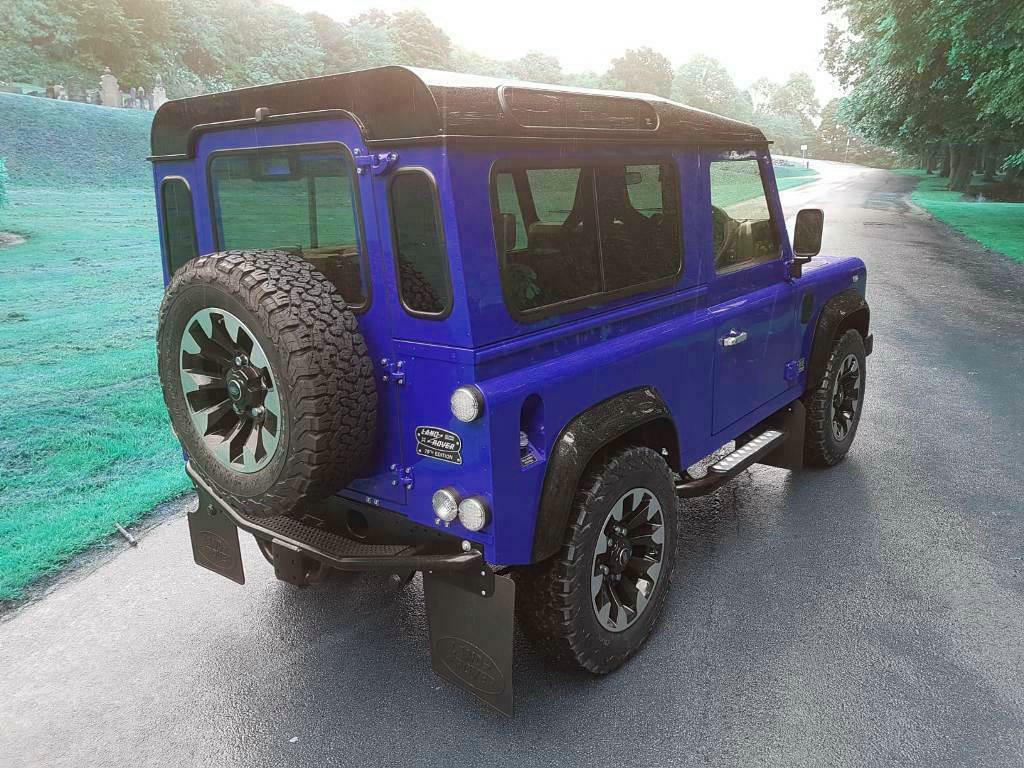

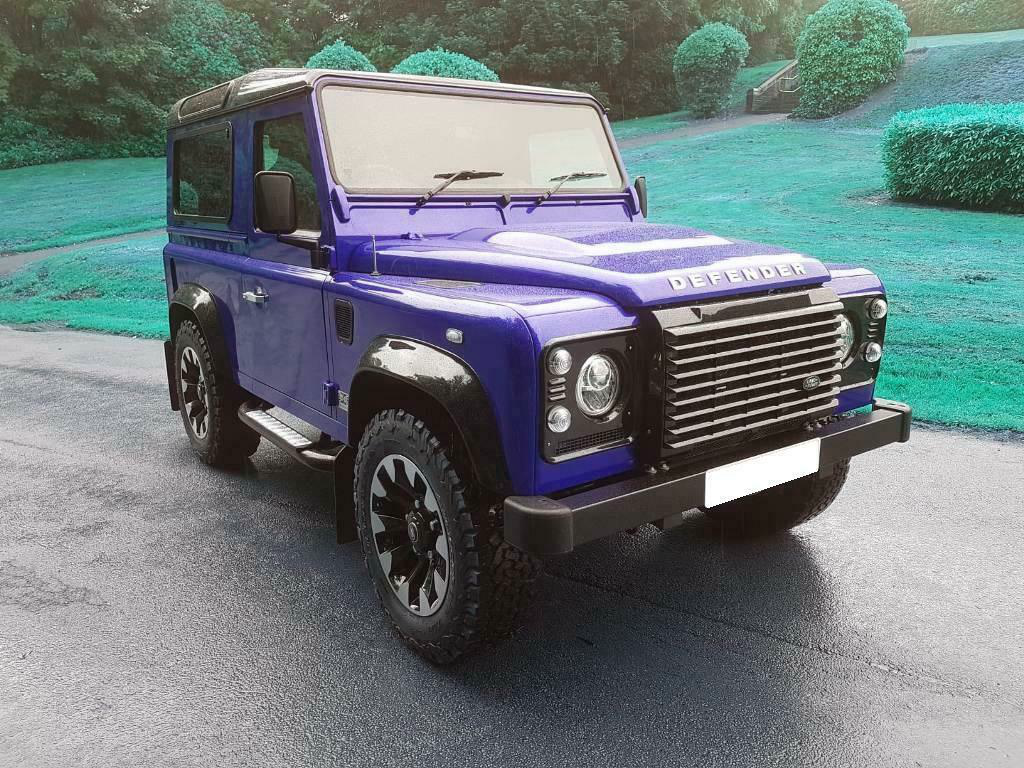

In [27]:
# Ejercicio muestre la imagen m'as similar de un dataset
img =  io.imread('https://i.ebayimg.com/images/g/3p8AAOSwk2Je64ym/s-l1600.jpg')
cv2_imshow(img)
img2 = io.imread(df['image'][0])
cv2_imshow(img2)